["Roger Federer", 0.7193697480417766, 0.2806302519582235, 8.261405672009865, 1.5487053020961776],
["Novak Djokovic", 0.6919147804332736, 0.3080852195667264, 5.656934306569343, 2.239051094890511],
["Rafael Nadal", 0.6848565116264265, 0.3151434883735736, 3.3141025641025643, 1.732905982905983],
["Andy Murray", 0.6612316817164237, 0.3387683182835763, 6.993932038834951, 2.4308252427184467],
["Andy Roddick", 0.712895230721064, 0.2871047692789361, 12.33090909090909, 1.7563636363636363],
["Stan Wawrinka", 0.6636913299390815, 0.33630867006091847, 7.432795698924731, 2.3763440860215055],
["Lleyton Hewitt", 0.6314656604029686, 0.36853433959703136, 6.245901639344262, 3.7540983606557377],
["Gilles Simon", 0.622119630659578, 0.377880369340422, 4.354706684856753, 2.4038199181446114],
["Marat Safin", 0.6393398337713139, 0.3606601662286861, 8.976190476190476, 2.9404761904761907],
["Juan Martin del Potro", 0.6798649318577962, 0.3201350681422039, 7.835564053537285, 2.2447418738049714],
["Marin Cilic", 0.6

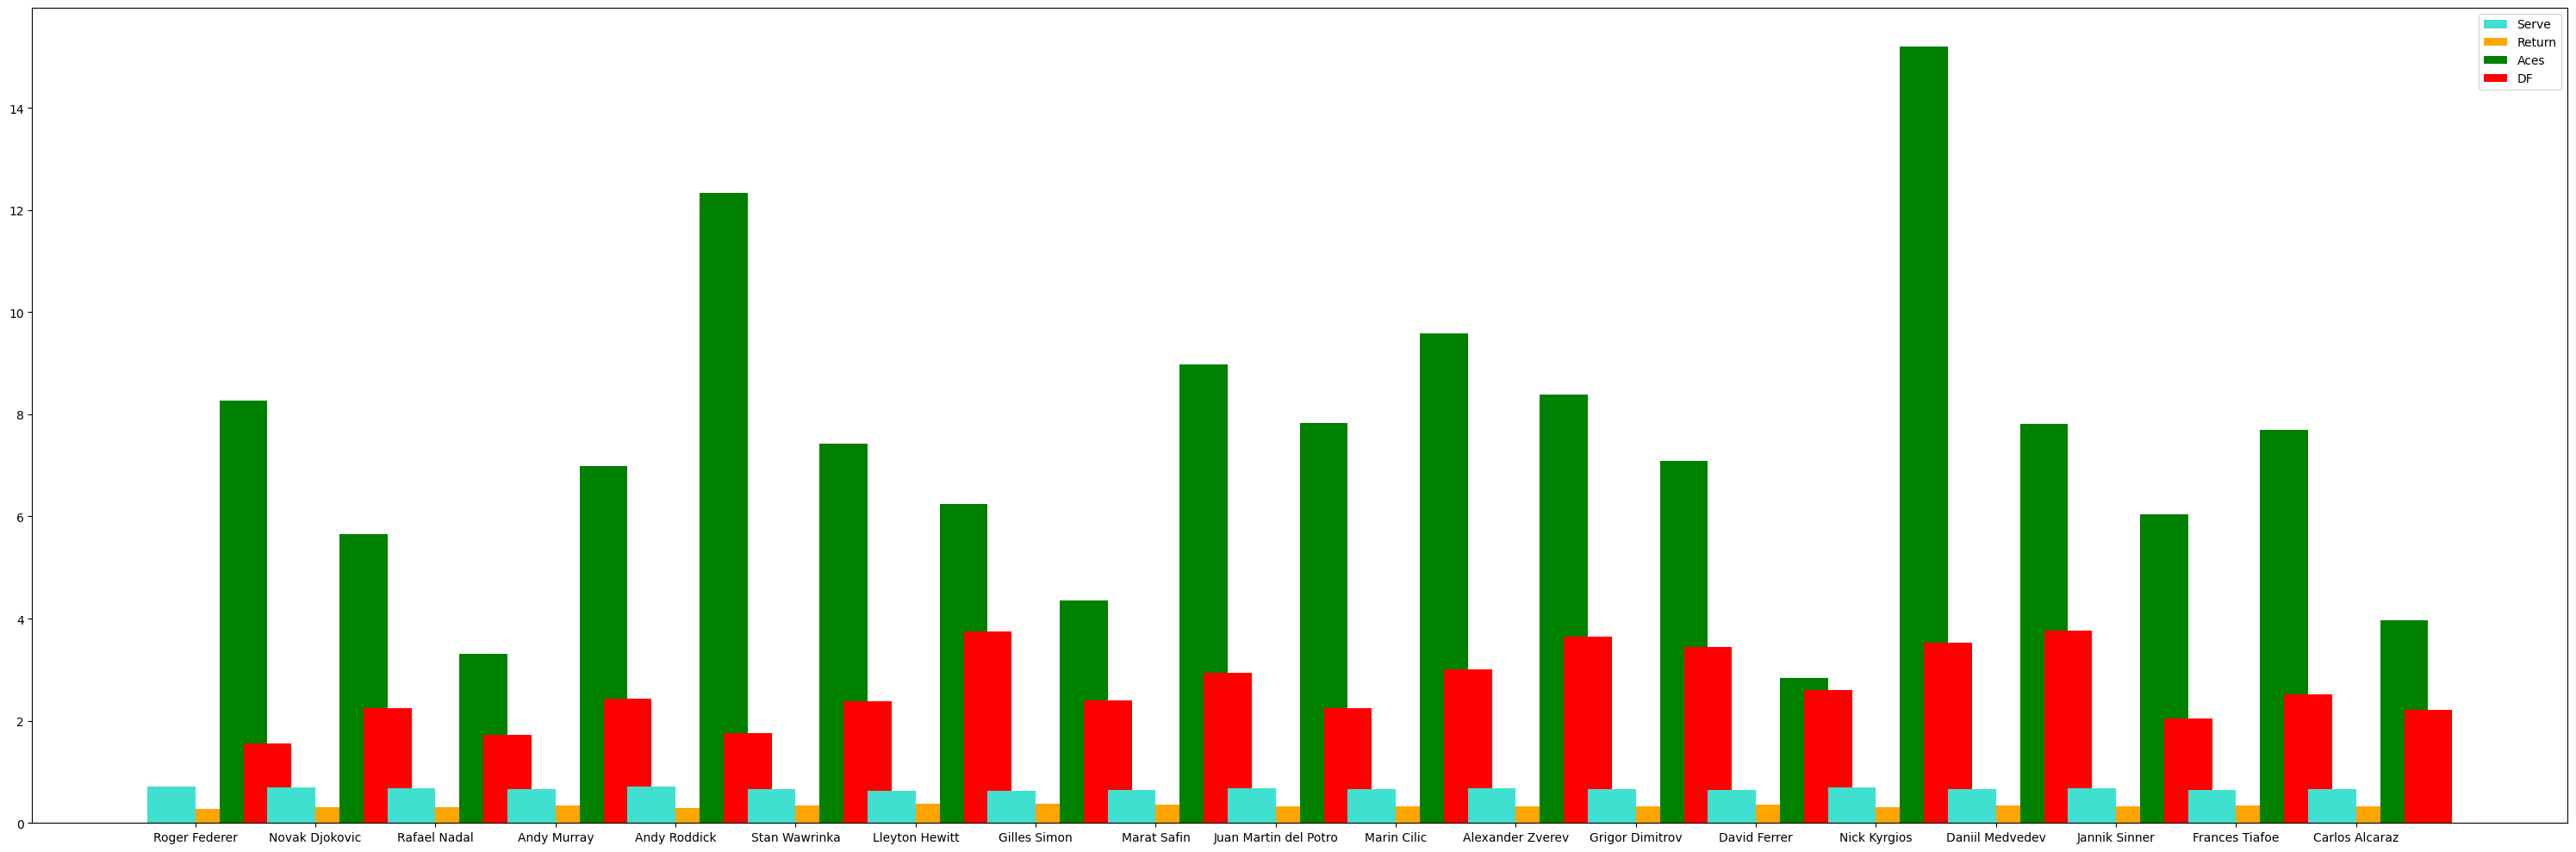

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data = pd.read_csv("atp_matches_2008.csv", low_memory=False, na_values=[' ', ''])

data.columns = data.columns.str.strip()

players = ["Roger Federer", 
           "Novak Djokovic", 
           "Rafael Nadal", 
           "Andy Murray", 
           "Andy Roddick",
           "Stan Wawrinka", 
           "Lleyton Hewitt", 
           "Gilles Simon", 
           "Marat Safin", 
           "Juan Martin del Potro",
           "Marin Cilic", 
           "Alexander Zverev", 
           "Grigor Dimitrov", 
           "David Ferrer", 
           "Nick Kyrgios",
           "Daniil Medvedev", 
           "Jannik Sinner", 
           "Frances Tiafoe", 
           "Carlos Alcaraz"
]

w_all_data = []
l_all_data = []


for idx, row in data.iterrows():
    for p in players:
        if row['winner_name'] and str(row['winner_name']).strip() == p:
            try:
                w_serve_to_points = float(row['w_svpt'])
                w_first_serves = float(row['w_1stWon'])
                w_second_serves = float(row['w_2ndWon'])
                w_aces = float(row['w_ace'])
                w_df = float(row['w_df'])

                if w_serve_to_points > 0:
                    w_serves_to_points = (w_first_serves + w_second_serves) / w_serve_to_points
                    l_return_accuracy = (w_serve_to_points - (w_first_serves + w_second_serves)) / w_serve_to_points
                    w_all_data.append([p, w_serves_to_points, l_return_accuracy, w_aces, w_df])

            except (ValueError, TypeError):
                continue

        if row['loser_name'] and str(row['loser_name']).strip() == p:
            try:
                l_serve_to_points = float(row['l_svpt'])
                l_first_serves = float(row['l_1stWon'])
                l_second_serves = float(row['l_2ndWon'])
                l_aces = float(row['l_ace'])
                l_df = float(row['l_df'])

                if l_serve_to_points > 0:
                    l_serves_to_points = (l_first_serves + l_second_serves) / l_serve_to_points
                    w_return_accuracy = (l_serve_to_points - (l_first_serves + l_second_serves)) / l_serve_to_points
                    l_all_data.append([p, l_serves_to_points, w_return_accuracy, l_aces, l_df])

            except (ValueError, TypeError):
                continue  

total_all_data = w_all_data + l_all_data

total_all_data_dict = {p: {"serve": [], "return": [], "aces": [], "df": []} for p in players}

for i in total_all_data:
    player = i[0]
    serve_value = i[1]
    return_value = i[2]
    aces = i[3]
    df = i[4]
    
    if player in total_all_data_dict and not math.isnan(serve_value) and not math.isnan(return_value):
        total_all_data_dict[player]["serve"].append(serve_value)
        total_all_data_dict[player]["return"].append(return_value)
        total_all_data_dict[player]["aces"].append(aces)
        total_all_data_dict[player]["df"].append(df)

plt.figure(figsize=(30, 10))

for idx, (player, vals) in enumerate(total_all_data_dict.items()):
    serve_vals = vals["serve"]
    return_vals = vals["return"]
    aces_vals = vals["aces"]
    df_vals = vals["df"]
    if serve_vals and return_vals:
        avg_serve = sum(serve_vals) / len(serve_vals)
        avg_return = sum(return_vals) / len(return_vals)
        avg_aces = sum(aces_vals) / len(aces_vals)
        avg_df = sum(df_vals) / len(df_vals)
        print(f'["{player}", {avg_serve}, {avg_return}, {avg_aces}, {avg_df}],')
        plt.bar(idx - 0.2, avg_serve, width=0.4, label='Serve' if idx == 0 else "", color='turquoise')
        plt.bar(idx + 0.2, avg_return, width=0.4, label='Return' if idx == 0 else "", color='orange')
        plt.bar(idx + 0.4, avg_aces, width=0.4, label='Aces' if idx == 0 else "", color='green')
        plt.bar(idx + 0.6, avg_df, width=0.4, label='DF' if idx == 0 else "", color='red')

plt.xticks(range(len(players)), players)
plt.legend()
plt.tight_layout()
plt.show()